# Philippines Family Income and Expenditure

I choose “Filipino Family Income and Expenditure” data set: https://www.kaggle.com/grosvenpaul/family-income-and-expenditure

This data set have 60 columns and 41544 rows. 

**Problem that I need to solve is create best model in predicting household income:**
<ul>
<li> This is supervised regression problem. </li>
<li> I will use root mean square error (RMSE) measure performance because it calculate difference between predicted values and the actual values. </li>

$$RMSE = \sqrt{\frac{\sum\limits_{i = 1}^{N}(y_i - \hat{y_i})^2}{N}}$$

</ul>

# Data import and general view

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np 
from bokeh.plotting import show, figure
import seaborn as sns

In [2]:
data = pd.read_csv("Family_Income_and_Expenditure.csv") 

In [3]:
data.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
Total Household Income                           41544 non-null int64
Region                                           41544 non-null object
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null object
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  

In [5]:
pd.set_option('display.max_columns', 60)

In [6]:
round(data.describe(), 0)

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0,41544.0
mean,247556.0,85099.0,0.0,25134.0,18196.0,10540.0,10529.0,2550.0,5007.0,15437.0,1085.0,2295.0,4955.0,38375.0,20922.0,7160.0,11806.0,4095.0,7474.0,12522.0,5266.0,13817.0,54376.0,51.0,5.0,0.0,1.0,1.0,56.0,20.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
std,286881.0,51638.0,1.0,13466.0,11727.0,10498.0,7812.0,2970.0,3300.0,23705.0,2174.0,3999.0,7497.0,53112.0,39372.0,26902.0,19351.0,7299.0,21219.0,17547.0,13280.0,47644.0,147143.0,14.0,2.0,1.0,1.0,1.0,55.0,14.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
min,11285.0,2947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,104895.0,51017.0,0.0,16556.0,11020.0,3354.0,5504.0,1025.0,2873.0,1930.0,0.0,0.0,1365.0,13080.0,6000.0,300.0,2412.0,564.0,0.0,3792.0,0.0,0.0,0.0,41.0,3.0,0.0,0.0,0.0,25.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,164080.0,72986.0,0.0,23324.0,16620.0,7332.0,8695.0,1820.0,4314.0,7314.0,270.0,300.0,2740.0,22992.0,10800.0,1125.0,6036.0,1506.0,880.0,6804.0,1500.0,0.0,19222.0,51.0,4.0,0.0,1.0,1.0,40.0,17.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
75%,291138.0,105636.0,1.0,31439.0,23920.0,14292.0,13388.0,3100.0,6304.0,19921.0,1299.0,3146.0,5580.0,45948.0,24000.0,4680.0,13776.0,3900.0,4060.0,14154.0,5000.0,6313.0,65969.0,61.0,6.0,1.0,2.0,2.0,70.0,26.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
max,11815988.0,827565.0,2.0,765864.0,758326.0,261566.0,188208.0,273769.0,74800.0,725296.0,59592.0,139370.0,356750.0,2188560.0,1920000.0,1049275.0,834996.0,149940.0,731000.0,553560.0,556700.0,3729973.0,9234485.0,99.0,26.0,5.0,8.0,8.0,998.0,200.0,9.0,1.0,6.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,10.0,6.0,3.0,3.0,5.0


Currency in this data set is Philippine peso (₱). For better understanding 1 Philippine peso is 0,018 Euras (05/11/2019).

Mean value of "Total Household Income" is 247 556₱ which is 4 426,94€ per year or 368,91€ per month.

Min value of "Total Household Income" is 11 285₱ which is 201,80€ per year or 16,82€ per month.

Max value of "Total Household Income" is 11 815 988₱ which is 211 297,55€ per year or 17 608,13€ per month.

Biggest mean expenses is for housing and water, second is for bread and cereals and third for rice.

# 1. Visualization

In [7]:
# spliting data in numeric and text
colnumber = len(data.columns)
data_number = pd.DataFrame()
data_text = pd.DataFrame()
for i in range(colnumber):
    if data.dtypes[i] == "int64":
        data_number[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])
    else:
        data_text[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])

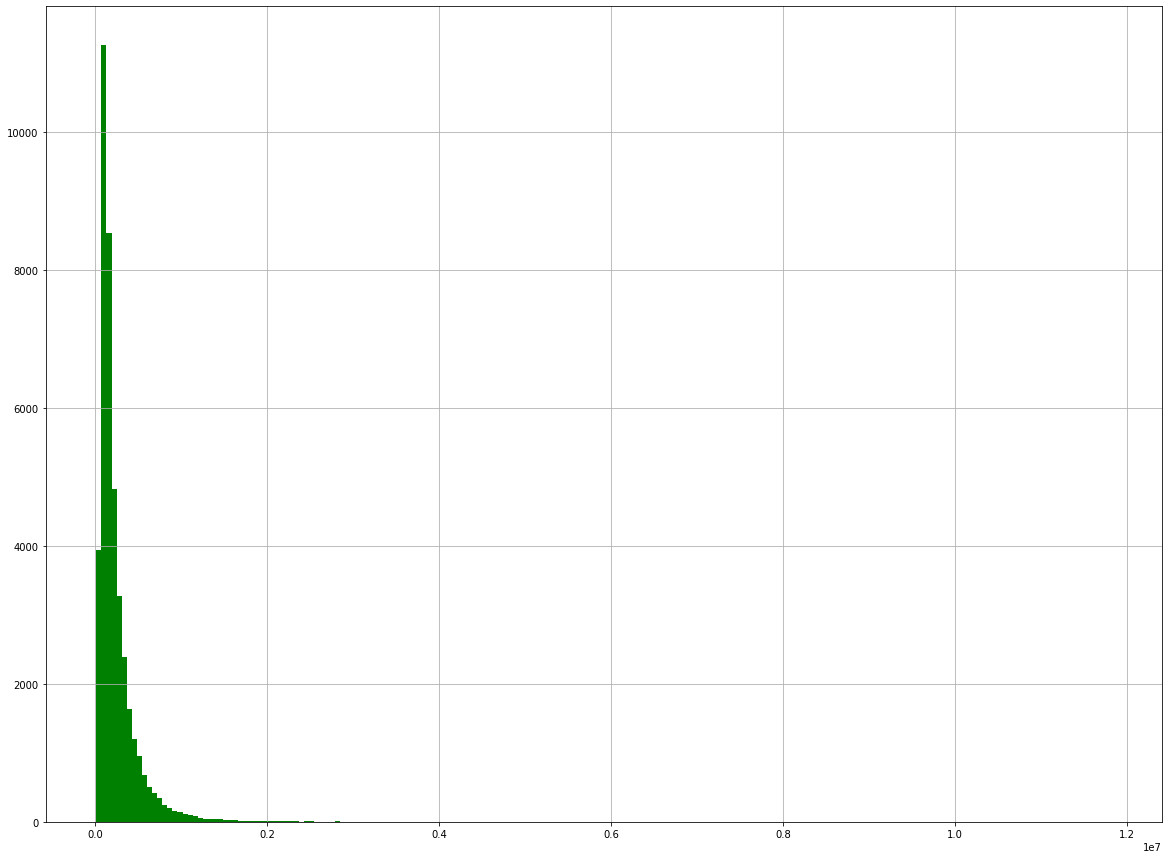

In [8]:
# Target value
income = data["Total Household Income"]
income.hist(bins=200, figsize=(20,15), color = "g")
plt.show()

## 1.1 Expenses

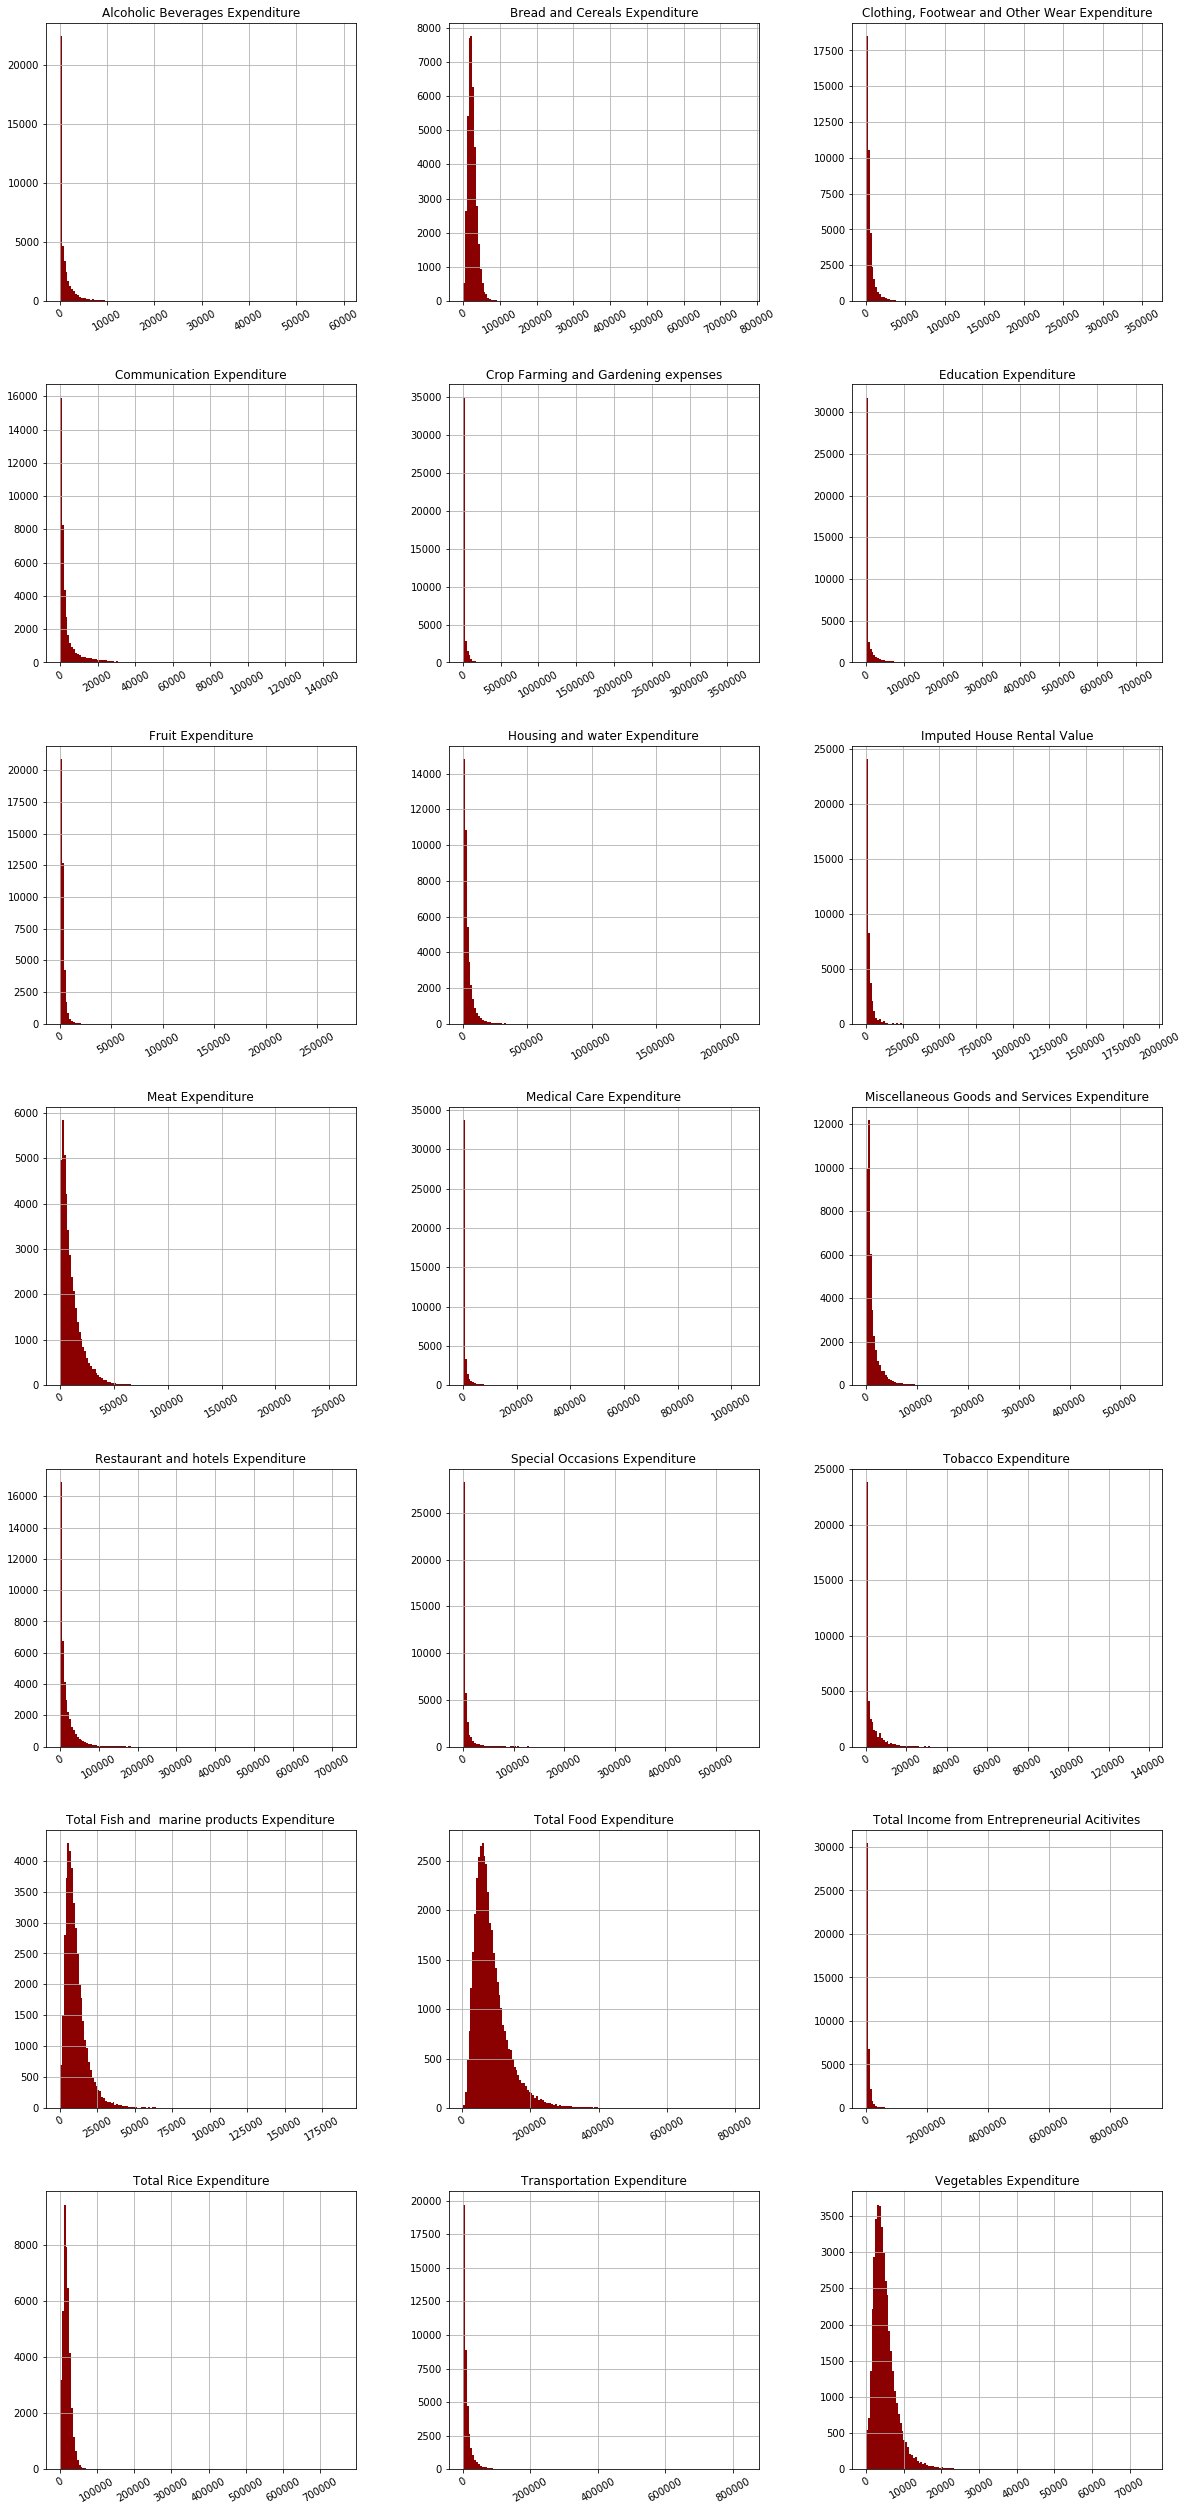

In [9]:
# show all columns that contains expenses + imputed house rental value + total income from entrepreneurial activities
expenditures = data_number.iloc[:,0:23].drop("Agricultural Household indicator", axis = 1)
expenditures2 = data_number.iloc[:,0:23].drop(["Agricultural Household indicator", "Total Household Income"], axis = 1)
expenditures2.hist(xrot = 30, layout=(7,3), bins=150, figsize=(20,45), color = "darkred")
plt.show()

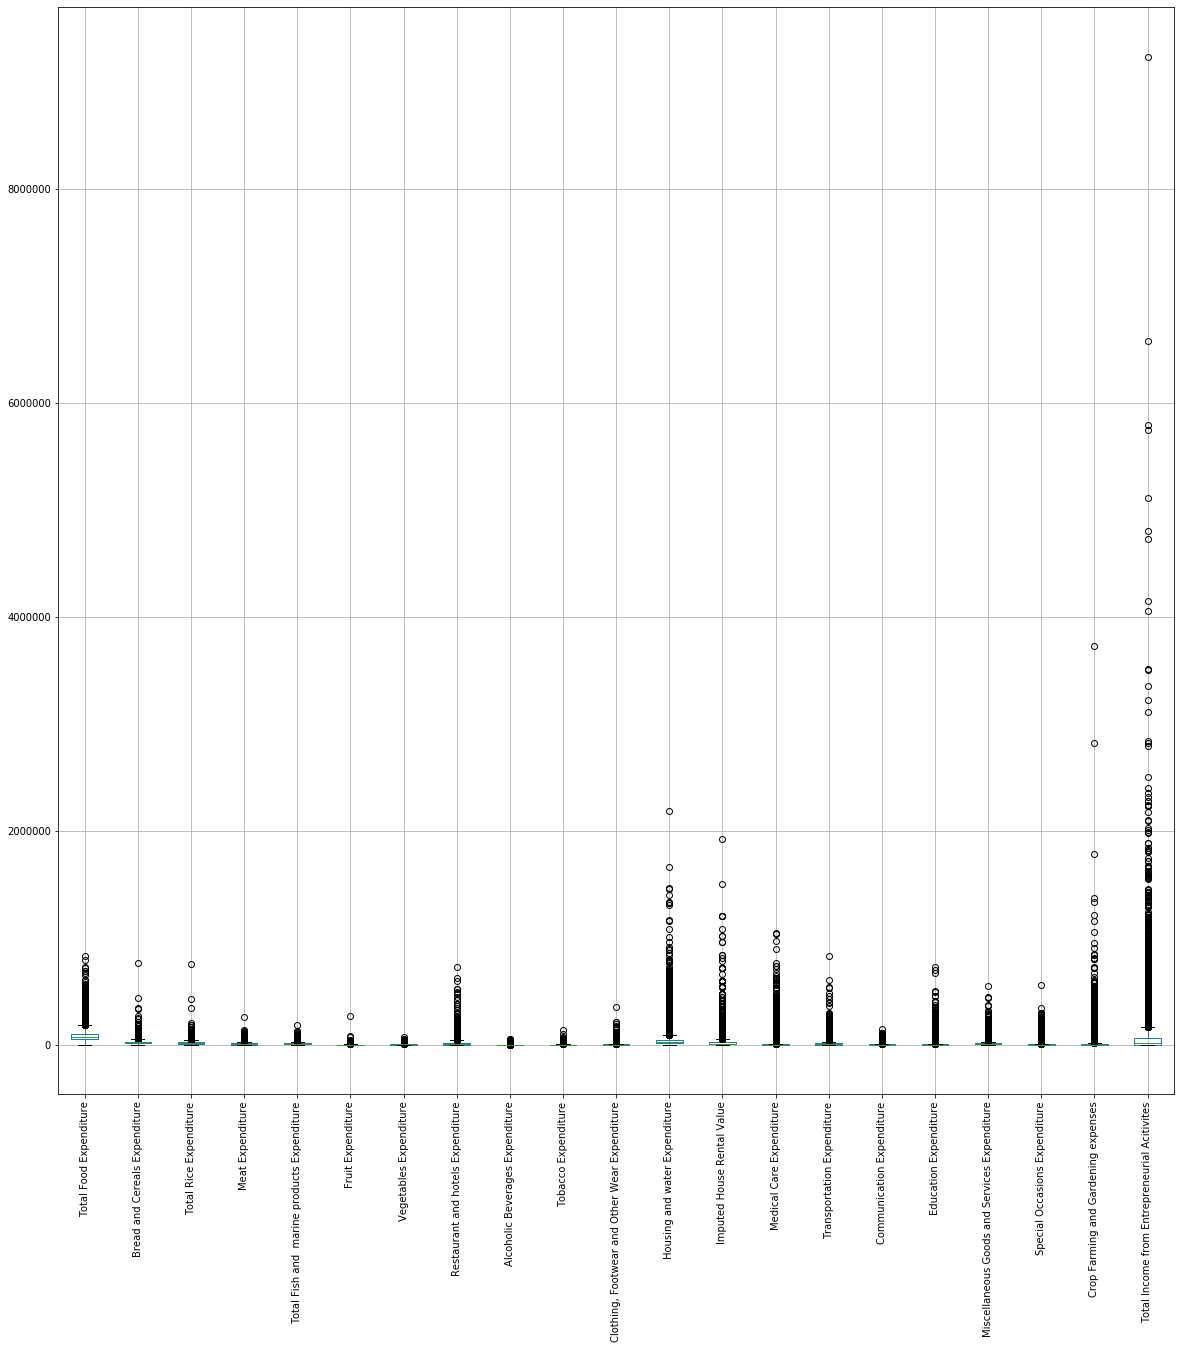

In [66]:
expenditures2.boxplot(rot=90, figsize=(20,20))

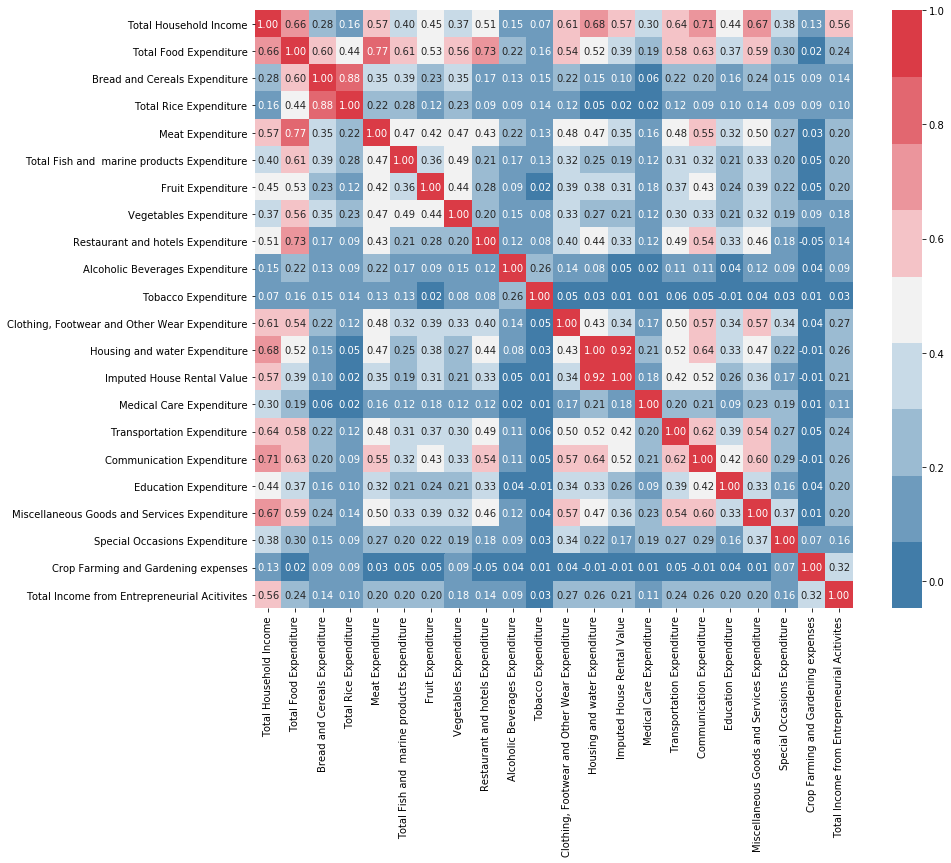

In [10]:
expenditures["Total Household Income"] = data.iloc[:,0]
corrmat = expenditures.corr()

f, ax = plt.subplots(figsize=(14,11))
corr_expenses = sns.heatmap(corrmat, square=True, cmap=sns.diverging_palette(240, 10, n=9), annot = True, cbar=True, fmt='.2f')
bottom, top = corr_expenses.get_ylim()
corr_expenses.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

A strong correlation with my target variable is expenses for communication (0.71).

A moderate correlation is with expenses for: total food, meat, housing and water, transportation and so on. That we can see is that a lot of expenses is correlated with total food expenses. For this reason I think that total food expenses will be one of important variable in predicting model then trying to reduce number of variables.

Two very intresting things: 

1) water and housig expenditures is very strong correlated with imputed house rental value. That means that those who spend more on housing and water are evaluating bigger rental price for their home.

2) those who buy rices is a big chance that they will buy bread and cereals. 


## 1.2 Info about household

In [11]:
HH = data_number.iloc[:,23:45]
HH["Agricultural Household indicator"] = data_number.iloc[:,2]

In [12]:
HH.head(3)

,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Agricultural Household indicator
0,49,4,0,1,1,80,75,3,1,1,1,0,1,1,0,0,0,2,1,0,0,1,0
1,40,3,0,1,2,42,15,2,1,1,1,1,0,1,0,0,0,3,1,0,0,2,0
2,39,6,0,4,3,35,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


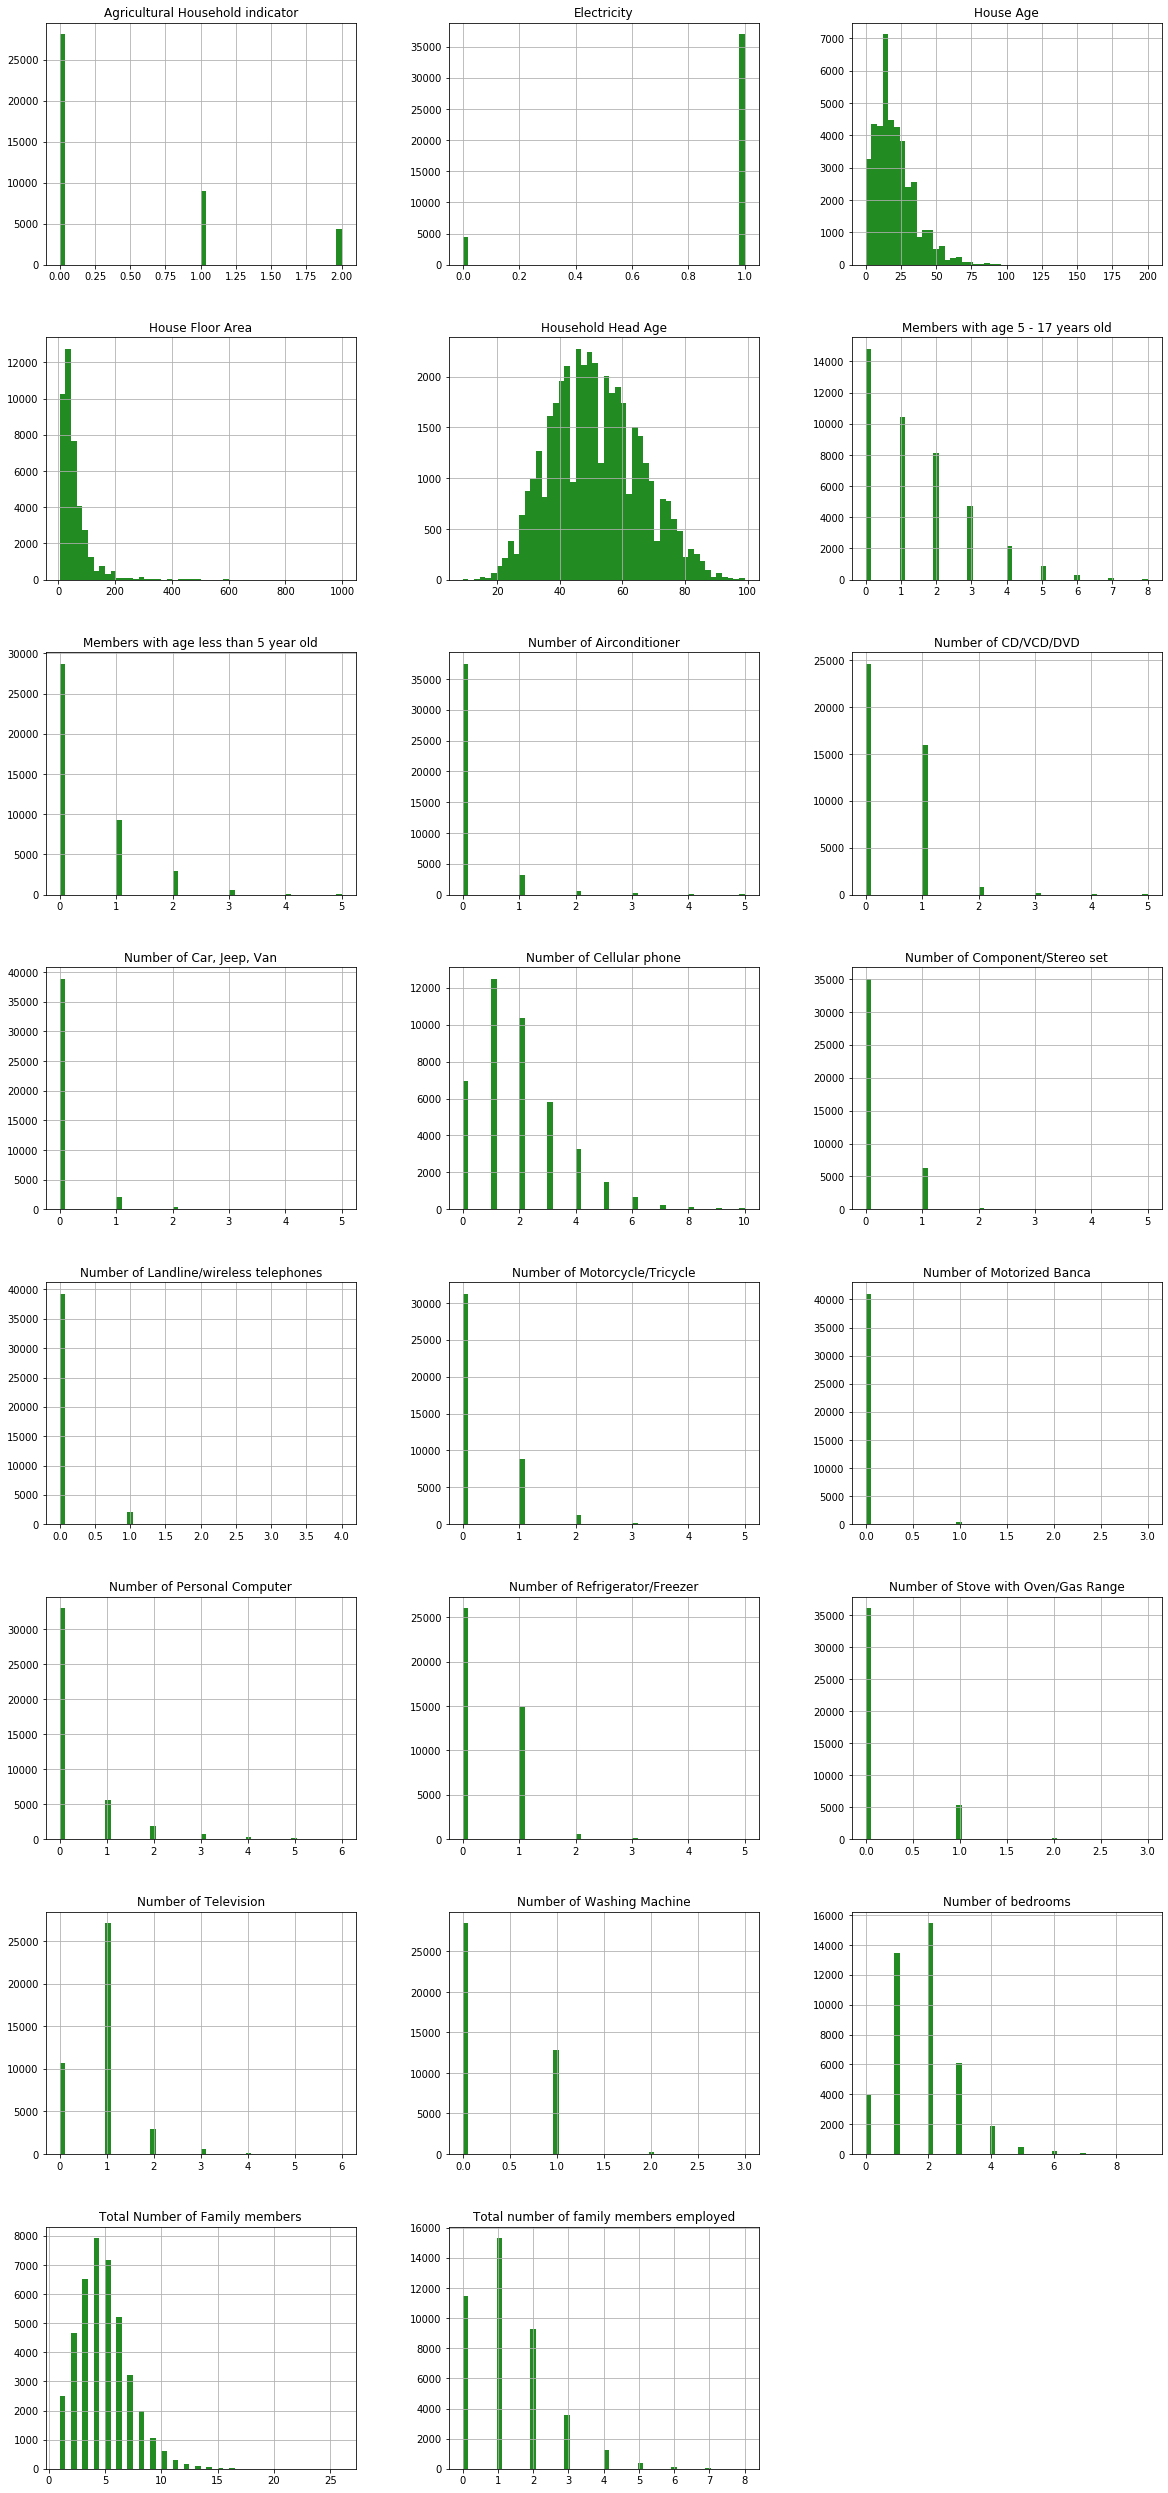

In [13]:
HH.hist(layout=(8,3), bins=50, figsize=(20,45), color = "forestgreen")
plt.show()

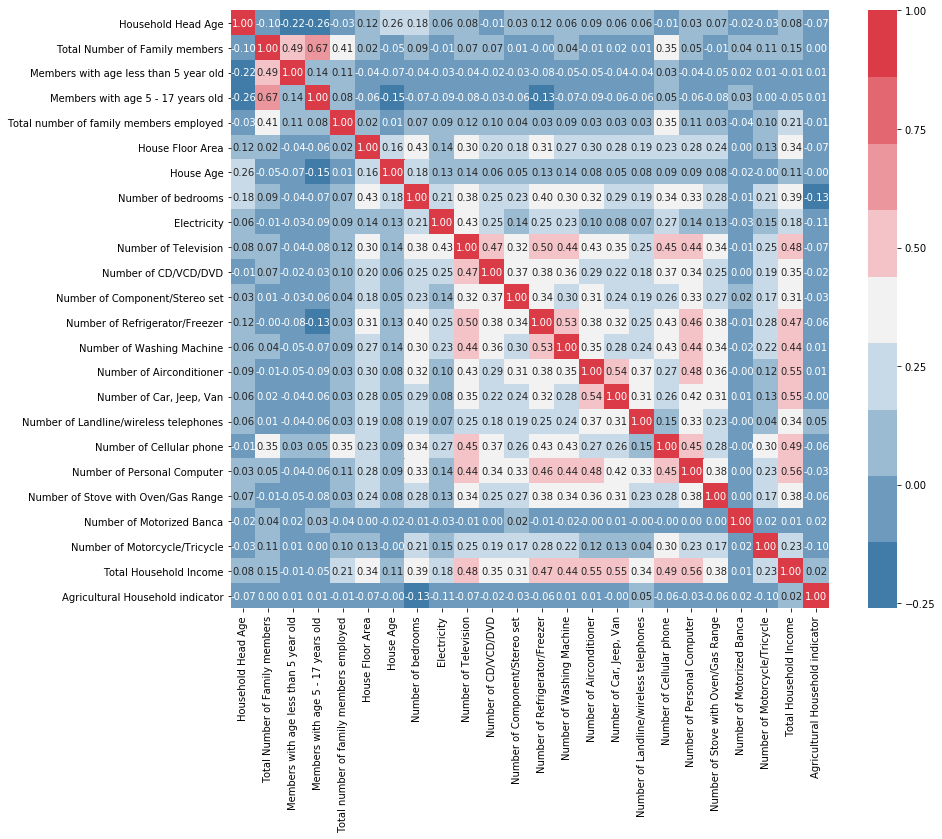

In [14]:
HH2 = data_number.iloc[:,23:45]
HH2["Total Household Income"] = data.iloc[:,0]
HH2["Agricultural Household indicator"] = data_number.iloc[:,2]
corr = HH2.corr()

f, ax = plt.subplots(figsize=(14,11))
corr_HH = sns.heatmap(corr, square=True, cmap=sns.diverging_palette(240, 10, n=9), annot = True, cbar=True, fmt='.2f')
bottom, top = corr_HH.get_ylim()
corr_HH.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Now we can see Total household income moderate correlation with number of airconditioner, number of car, van, jeep and number of personal computer.

## 1.3 Text data

In [15]:
data_text.head(2)

,Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply
0,CAR,Wage/Salaries,Female,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system"
1,CAR,Wage/Salaries,Male,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system"


In [18]:
# Total household income by intervals
interval_cut = pd.qcut(data["Total Household Income"], q=10)

### 1.3.1. Regions

In [223]:
data["Region"].value_counts()

IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: Region, dtype: int64

(17.0, 0.0)

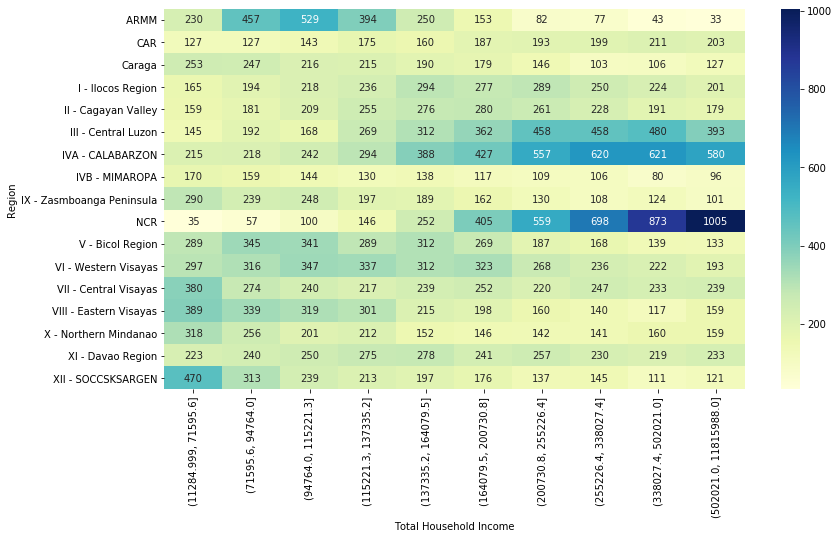

In [273]:
fig, ax = plt.subplots(figsize=(13,7))
df = pd.crosstab(index=data["Region"], columns = interval_cut)
cross_region = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_region.get_ylim()
cross_region.set_ylim(bottom + 0.5, top - 0.5)

People with biggest income choose to live in NCR region. This region is in second place to live by all respondents.

Respondents who get mean income more likely choose to live in IVA - CALABARZON region (most popular region by all respondents).

Those who get lowest income live in XII-SOCCSKSARGEN.

### 1.3.2. Main Source of Income

In [233]:
data["Main Source of Income"].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64

(3.0, 0.0)

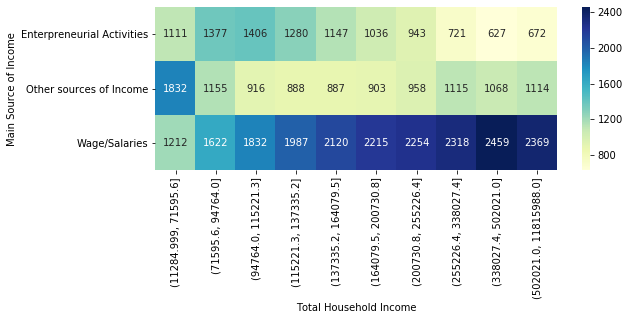

In [238]:
fig, ax = plt.subplots(figsize=(9,3))
df = pd.crosstab(index=data["Main Source of Income"], columns = interval_cut)
cross_source = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_source.get_ylim()
cross_source.set_ylim(bottom + 0.5, top - 0.5)

Those who get smallest income, get it from other sources 

### 1.3.3. Household Head Sex

In [239]:
data["Household Head Sex"].value_counts()

Male      32483
Female     9061
Name: Household Head Sex, dtype: int64

### 1.3.4. Household Head Marital Status

In [241]:
data["Household Head Marital Status"].value_counts()

Married               31347
Widowed                6818
Single                 1942
Divorced/Separated     1425
Annulled                 11
Unknown                   1
Name: Household Head Marital Status, dtype: int64

### 1.3.5. Household Head Highest Grade Completed

In [244]:
data["Household Head Highest Grade Completed"].value_counts()

High School Graduate                                                                                                                                                                                                   9628
Elementary Graduate                                                                                                                                                                                                    7640
Grade 4                                                                                                                                                                                                                2282
Grade 5                                                                                                                                                                                                                2123
Second Year High School                                                                                                 

### 1.3.6. Household Head Job or Business Indicator

In [245]:
data["Household Head Job or Business Indicator"].value_counts()

With Job/Business    34008
No Job/Business       7536
Name: Household Head Job or Business Indicator, dtype: int64

(2.0, 0.0)

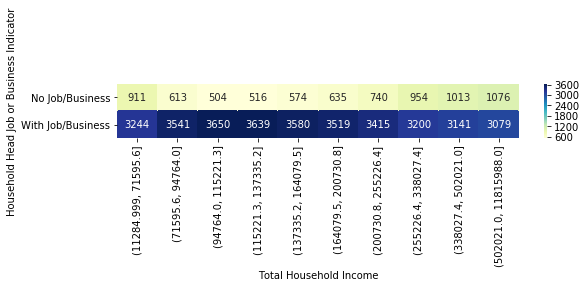

In [248]:
fig, ax = plt.subplots(figsize=(9,1))
df = pd.crosstab(index=data["Household Head Job or Business Indicator"], columns = interval_cut)
cross_job = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_job.get_ylim()
cross_job.set_ylim(bottom + 0.5, top - 0.5)

### 1.3.7. Household Head Occupation

In [249]:
data["Household Head Occupation"].value_counts()

Farmhands and laborers                                                                 3478
Rice farmers                                                                           2849
General managers/managing proprietors in wholesale and retail trade                    2028
General managers/managing proprietors in transportation, storage and communications    1932
Corn farmers                                                                           1724
                                                                                       ... 
Insulation workers                                                                        1
Builders (traditional materials)                                                          1
Coding, proof-reading and related clerks                                                  1
Nursing associate professionals                                                           1
Farm technicians                                                                

### 1.3.8. Household Head Class of Worker

In [252]:
data["Household Head Class of Worker"].value_counts()

Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: Household Head Class of Worker, dtype: int64

(7.0, 0.0)

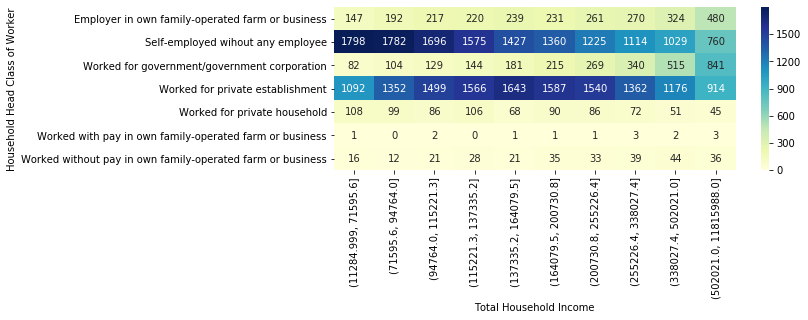

In [254]:
fig, ax = plt.subplots(figsize=(9,3))
df = pd.crosstab(index=data["Household Head Class of Worker"], columns = interval_cut)
cross_class = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_class.get_ylim()
cross_class.set_ylim(bottom + 0.5, top - 0.5)

Bigest part of smallest income get those respondents who is self-employed without any employee.

Number of people who work for government/government corporation is rising in proportion with income level.

### 1.3.9. Type of Household

In [255]:
data["Type of Household"].value_counts()

Single Family                             28445
Extended Family                           12932
Two or More Nonrelated Persons/Members      167
Name: Type of Household, dtype: int64

(3.0, 0.0)

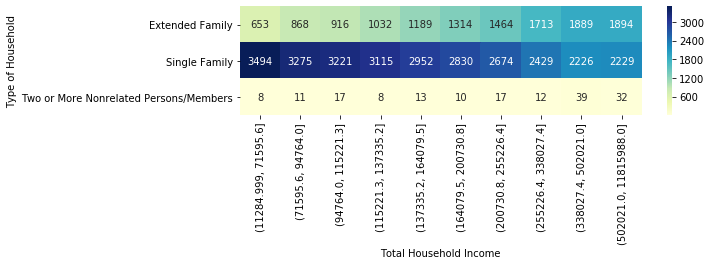

In [257]:
fig, ax = plt.subplots(figsize=(9,2))
df = pd.crosstab(index=data["Type of Household"], columns = interval_cut)
cross_type = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_type.get_ylim()
cross_type.set_ylim(bottom + 0.5, top - 0.5)

### 1.3.10. Type of Building/House	

In [258]:
data["Type of Building/House"].value_counts()

Single house                                   39069
Multi-unit residential                          1329
Duplex                                          1084
Commercial/industrial/agricultural building       51
Institutional living quarter                       9
Other building unit (e.g. cave, boat)              2
Name: Type of Building/House, dtype: int64

(6.0, 0.0)

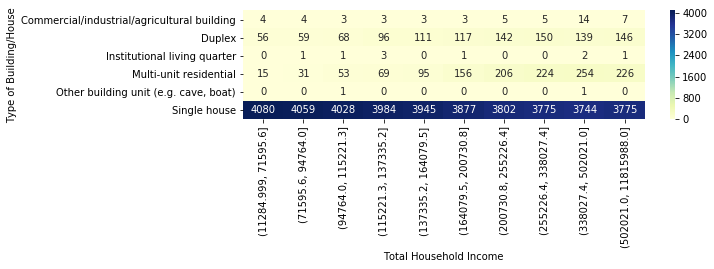

In [259]:
fig, ax = plt.subplots(figsize=(9,2))
df = pd.crosstab(index=data["Type of Building/House"], columns = interval_cut)
cross_house = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_house.get_ylim()
cross_house.set_ylim(bottom + 0.5, top - 0.5)

### 1.3.11. Type of Roof	

In [260]:
data["Type of Roof"].value_counts()

Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)    33342
Light material (cogon,nipa,anahaw)                                         5074
Mixed but predominantly strong materials                                   2002
Mixed but predominantly light materials                                     846
Salvaged/makeshift materials                                                212
Mixed but predominantly salvaged materials                                   56
Not Applicable                                                               12
Name: Type of Roof, dtype: int64

### 1.3.12. Type of Walls

In [262]:
data["Type of Walls"].value_counts()

Strong            27739
Light              8267
Quite Strong       3487
Very Light         1583
Salvaged            456
NOt applicable       12
Name: Type of Walls, dtype: int64

### 1.3.13. Tenure Status

In [264]:
data["Tenure Status"].value_counts()

Own or owner-like possession of house and lot        29541
Own house, rent-free lot with consent of owner        6165
Rent house/room including lot                         2203
Rent-free house and lot with consent of owner         2014
Own house, rent-free lot without consent of owner      995
Own house, rent lot                                    425
Rent-free house and lot without consent of owner       128
Not Applicable                                          73
Name: Tenure Status, dtype: int64

(8.0, 0.0)

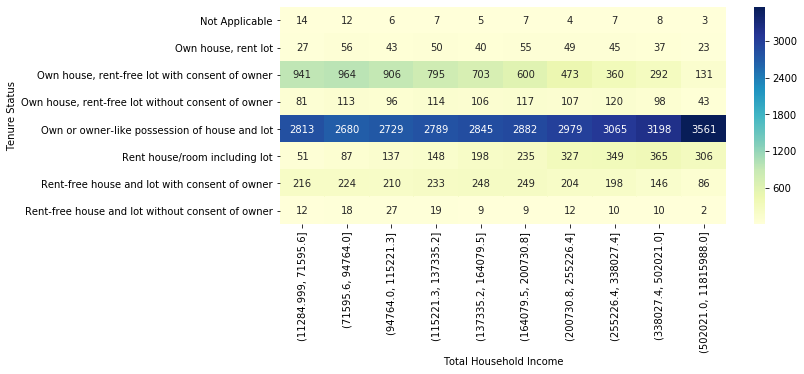

In [268]:
fig, ax = plt.subplots(figsize=(10,4))
df = pd.crosstab(index=data["Tenure Status"], columns = interval_cut)
cross_house = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_house.get_ylim()
cross_house.set_ylim(bottom + 0.5, top - 0.5)

### 1.3.14. Toilet Facilities

In [269]:
data["Toilet Facilities"].value_counts()

Water-sealed, sewer septic tank, used exclusively by household    29162
Water-sealed, sewer septic tank, shared with other household       3694
Water-sealed, other depository, used exclusively by household      2343
Closed pit                                                         2273
None                                                               1580
Open pit                                                           1189
Water-sealed, other depository, shared with other household         950
Others                                                              353
Name: Toilet Facilities, dtype: int64

(8.0, 0.0)

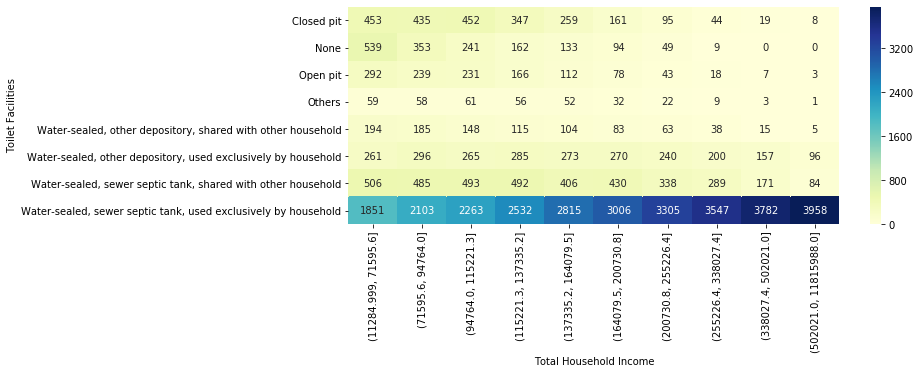

In [271]:
fig, ax = plt.subplots(figsize=(11,4))
df = pd.crosstab(index=data["Toilet Facilities"], columns = interval_cut)
cross_toilet = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_toilet.get_ylim()
cross_toilet.set_ylim(bottom + 0.5, top - 0.5)

Respondents with lower income is more using closed / open pit or water-sealed, sewer septic tank, shared with other household. Those who get bigger income will have their on  water-sealed, sewer septic tank.

### 1.3.15. Main Source of Water Supply

In [16]:
data["Main Source of Water Supply"].value_counts()

Own use, faucet, community water system    16093
Shared, tubed/piped deep well               6242
Shared, faucet, community water system      4614
Own use, tubed/piped deep well              4587
Dug well                                    3876
Protected spring, river, stream, etc        2657
Tubed/piped shallow well                    1394
Peddler                                      851
Unprotected spring, river, stream, etc       607
Lake, river, rain and others                 496
Others                                       127
Name: Main Source of Water Supply, dtype: int64

(11.0, 0.0)

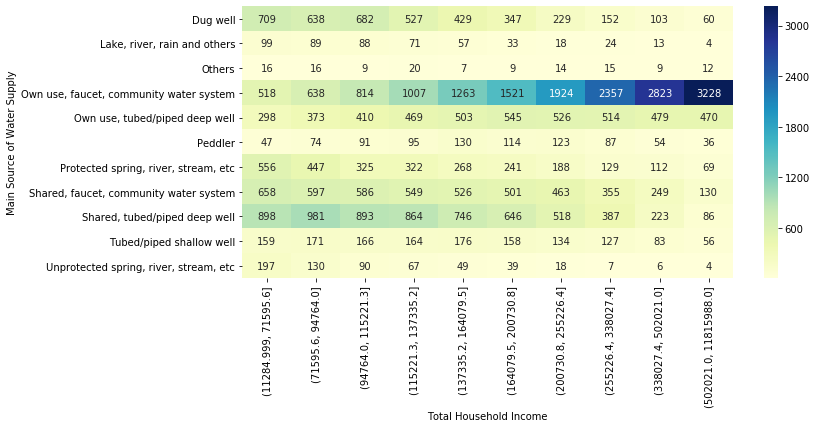

In [19]:
fig, ax = plt.subplots(figsize=(11,5))
df = pd.crosstab(index=data["Main Source of Water Supply"], columns = interval_cut)
cross_toilet = sns.heatmap(df, cmap="YlGnBu", annot = True, cbar=True, fmt='.0f')
bottom, top = cross_toilet.get_ylim()
cross_toilet.set_ylim(bottom + 0.5, top - 0.5)

Main source of water of lower income people is dug well, shared well, rivers. Those who get bigger income will use own piped deep well or faucet, community system.